In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
%matplotlib inline
style.use("ggplot")

accuracy = metrics.accuracy_score

### Instantiate Models

In [61]:
m1 = rforest = RandomForestClassifier()
m2 = logreg = LogisticRegression()
m3 = knn = KNeighborsClassifier()
m4 = gnb = GaussianNB()
m5 = multi = MultinomialNB()
m6 = bernoulli = BernoulliNB()

m7 = poly = svm.SVC(kernel='poly', C=1,gamma='auto')
m8 = rbf = svm.SVC(kernel='rbf', C=1,gamma='auto')
m9 = linear = svm.SVC(kernel='linear', C=1,gamma='auto')
m10 = sigmoid = svm.SVC(kernel='sigmoid', C=1,gamma='auto')

models = [m1,m2,m3,m4,m5,m6]

In [62]:
m = [m7,m8,m9,m10] # Looping through these SVM models lag the script

### Merge Data

In [63]:
train = pd.read_csv("titanic_training.csv", header = 0) 
test = pd.read_csv("titanic_test.csv", header = 0)
ID = test['PassengerId'] # Extract ID Names From Test Set
data = pd.concat([train, test], axis = 0)
data.shape

(1309, 12)

### Delete Columns

In [64]:
del data['Name'], data['Ticket'], data['Cabin'], data['PassengerId']

### Convert Data

In [65]:
def transform_category(category): # Convert each string to a categorical value
    if category == 'Q': return 0
    if category == 'S': return 1
    if category == 'C': return 2

data['Embarked'] = data['Embarked'].apply(transform_category)
data['Sex'] = pd.get_dummies(data['Sex'])

In [66]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [67]:
data.fillna(method = 'ffill', inplace = True)
data = data.astype(float)
train = data[0:891]
test = data[891:]

### Separate Target From Training Data | Delete Survived Column From Test Data

In [68]:
# Grab Location of Survived
print("Shape of Data:", train.shape)
print("Index Location of Target:", train.columns.get_loc("Survived"))

Shape of Data: (891, 8)
Index Location of Target: 7


In [69]:
target = train.ix[:,7] # Separate Target
X = pd.DataFrame(train.ix[:, 0:7]) # Join All Other Data

In [70]:
del test['Survived'] # Delete Target From Testing Set to Match Shape of Training Set

In [71]:
print(target.shape)
print(X.shape)
print(test.shape)

(891,)
(891, 7)
(418, 7)


### Cross Validation 

In [72]:
from sklearn.cross_validation import cross_val_score
for model in models:
    cv_score = cross_val_score(model, X, target, cv=3, scoring = 'precision')
    print("CV Score",cv_score)
    print('Mean CV Score:',np.mean(cv_score))
    print(model, "\n")

CV Score [ 0.75757576  0.7706422   0.77      ]
Mean CV Score: 0.766072653137
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

CV Score [ 0.71153846  0.69421488  0.76344086]
Mean CV Score: 0.723064732596
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

CV Score [ 0.58333333  0.62857143  0.64473684]
Mean CV Score: 0.61888053467
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
       

### Split Data to Test Accuracy on Model

In [73]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.35)

In [74]:
print ("Features For Training Set: ", X_train.shape)
print ("Target Training Set: ", target_train.shape)
print ("Features For Testing Set: ", X_test.shape)
print ("Target For Testing Set: ", target_test.shape)

Features For Training Set:  (579, 7)
Target Training Set:  (579,)
Features For Testing Set:  (312, 7)
Target For Testing Set:  (312,)


### Interact 
- Note: If Test Section is Ran These Models Will Stop Working
- Run Up to Only Stop

In [75]:
for i in m:
    print(i)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [76]:
from ipywidgets import interact
"""Freezes Sometimes When Using SVC With Interact"""
model.fit(X_train, target_train)
target_pred = model.predict(X_test)
ranges = [1,100,1]
@interact(c_range = ranges, degree = ranges, gamma = ranges)
def acc(c_range, degree, gamma):
    model = svm.SVC(kernel = 'rbf', C = c_range, degree = degree, gamma = gamma)
    model.fit(X_train, target_train)
    target_test = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")
    print(model)

68.59 % Accuracy
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=50, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [77]:
from ipywidgets import interact
@interact(ranges = [1,30,1])
def acc(ranges):
    model = KNeighborsClassifier(n_neighbors = ranges)
    model.fit(X_train, target_train)
    target_test = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")

68.59 % Accuracy


### Model Accuracy

In [78]:
for model in models: 
    model.fit(X_train, target_train)
    target_pred = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")
    print(model, "\n")

79.49 % Accuracy
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

74.68 % Accuracy
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

70.51 % Accuracy
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 

75.64 % Accuracy
GaussianNB(priors=None) 

69.23 % Accuracy
MultinomialNB(alpha=1.0, class_pr

### Running Accuracy on a Single Model 

In [79]:
model = m1
model.fit(X_train, target_train)
target_pred = model.predict(X_test)
print (round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")
print(model)

78.53 % Accuracy
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Interact

In [80]:
# for i in m:
#     print(i)

In [81]:
# from ipywidgets import interact
# """Freezes Sometimes When Using SVC With Interact"""
# ranges = [1,100,1]
# @interact(c_range = ranges, degree = ranges, gamma = ranges)
# def acc(c_range, degree, gamma):
#     model = svm.SVC(kernel = 'rbf', C = c_range, degree = degree, gamma = gamma)
#     model.fit(X_train, target_train)
#     target_test = model.predict(X_test)
#     print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")
#     print(model)

In [82]:
# from ipywidgets import interact
# @interact(ranges = [1,30,1])
# def acc(ranges):
#     model = KNeighborsClassifier(n_neighbors = ranges)
#     model.fit(X_train, target_train)
#     target_test = model.predict(X_test)
#     print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")

### Statistics

In [83]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,1.0,7.2500,0.0,3.0,0.0,1.0,0.0
1,38.0,2.0,71.2833,0.0,1.0,1.0,1.0,1.0
2,26.0,1.0,7.9250,0.0,3.0,1.0,0.0,1.0
3,35.0,1.0,53.1000,0.0,1.0,1.0,1.0,1.0
4,35.0,1.0,8.0500,0.0,3.0,0.0,0.0,0.0


# Violin Plots

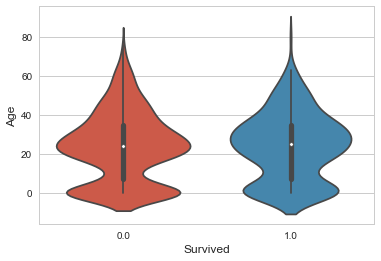

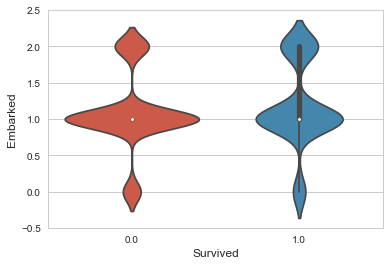

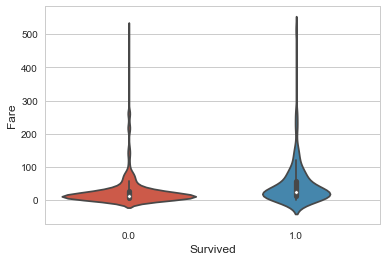

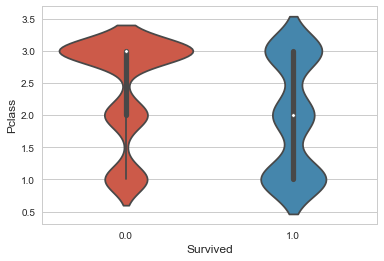

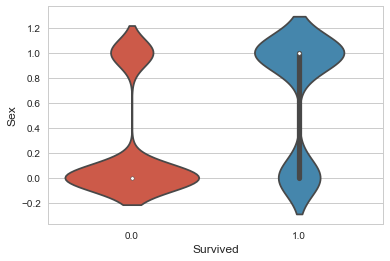

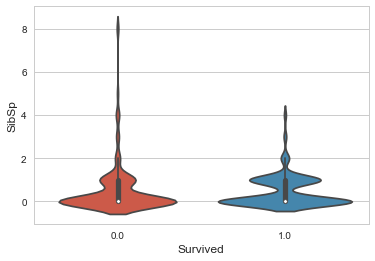

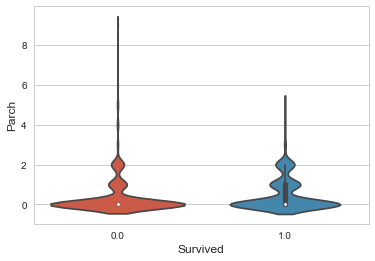

In [84]:
plt.figure(0);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Age" ,figsize=(8,6), data = data)

plt.figure(1);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Embarked" ,figsize=(8,6), data = data)

plt.figure(2);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Fare" ,figsize=(8,6), data = data)

plt.figure(3);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Pclass" ,figsize=(8,6), data = data)

plt.figure(4);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Sex" ,figsize=(8,6), data = data)


plt.figure(5);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "SibSp" ,figsize=(8,6), data = data)

plt.figure(6);
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Parch" ,figsize=(8,6), data = data)

In [85]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,1.0,7.2500,0.0,3.0,0.0,1.0,0.0
1,38.0,2.0,71.2833,0.0,1.0,1.0,1.0,1.0
2,26.0,1.0,7.9250,0.0,3.0,1.0,0.0,1.0
3,35.0,1.0,53.1000,0.0,1.0,1.0,1.0,1.0
4,35.0,1.0,8.0500,0.0,3.0,0.0,0.0,0.0


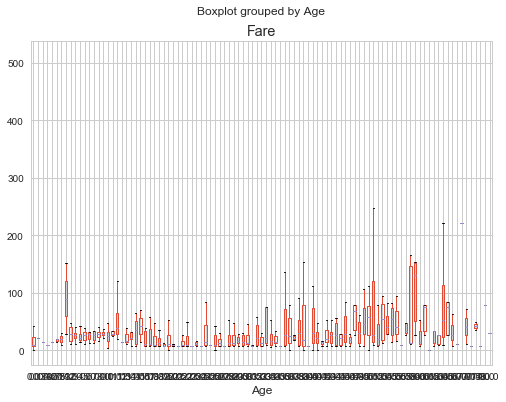

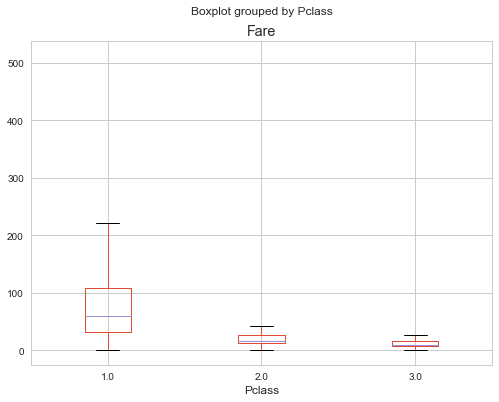

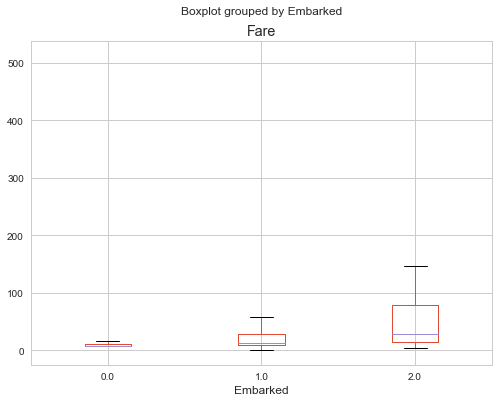

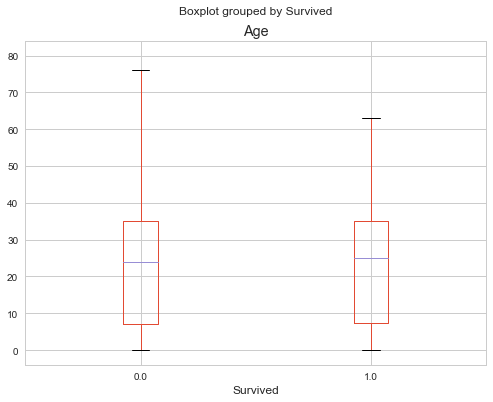

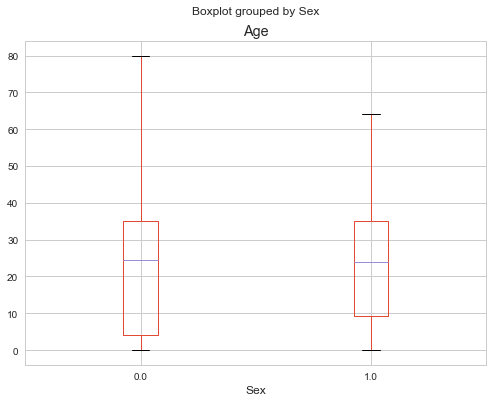

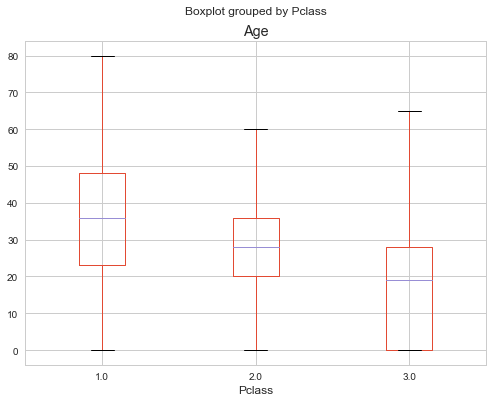

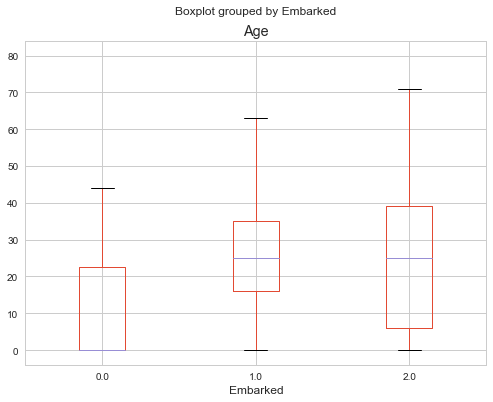

In [86]:
r_ = data.boxplot(column = 'Fare', by = 'Age',figsize=(8,6))
r_ = data.boxplot(column = 'Fare', by = 'Pclass',figsize=(8,6))
r_ = data.boxplot(column = 'Fare', by = 'Embarked',figsize=(8,6))
r_ = data.boxplot(column = 'Age', by = 'Survived',figsize=(8,6))
r_ = data.boxplot(column = 'Age', by = 'Sex',figsize=(8,6))
r_ = data.boxplot(column = 'Age', by = 'Pclass',figsize=(8,6))
r_ = data.boxplot(column = 'Age', by = 'Embarked',figsize=(8,6))

In [87]:
pd.crosstab(data.Age,data.Survived)

Survived,0.0,1.0
Age,,
0.00,211,52
0.17,1,0
0.33,1,0
0.42,0,1
0.67,0,1
0.75,1,2
0.83,1,2
0.92,1,1
1.00,5,5


# Stop 
- Model Accuracy Stops Here 

# Test on Actual Testing Set

In [59]:
model = m1
target_pred = model.predict(test)
predictions = pd.DataFrame(ID)
def predict(predictions):
    predictions["Survived"] = target_pred
    predictions = predictions.astype(int)
    return predictions

predict(predictions)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [30]:
# predictions.to_csv('titanic_submission.csv',index = False)